In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import re

In [2]:
df = pd.read_csv('../data/energy.csv', sep=',')

df = df.loc[[2]].drop(columns='Unnamed: 0').T
df.columns = ['energie']
df['The_date'] = df['energie']
df.head()

dict_month = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08','Sep': '09','Oct': '10','Nov': '11','Dec': '12'}

for i in range(len(df)):
    day = "".join(re.findall("\d", df.index[i].split(" ", 1)[0]))
    month = dict_month[df.index[i].split(" ")[1]]
    year = "".join(re.findall("\d", df.index[i].split(" ", 1)[1]))
    
    the_date = f'{day}-{month}-{year}'
        
    df['The_date'].iloc[i] = the_date
    
df['The_date'] = pd.to_datetime(df['The_date'])

#plt.plot(df['energie'])

In [3]:
df_rain = pd.read_csv('../data/precipitation_data.csv', sep=',')
df_temp= pd.read_csv('../data/temperature_data.csv', sep=';')
#df_temp.drop(columns=['Unnamed: 17'], inplace = True)
df.drop(df.index[0:2557], inplace=True) #(drop rows until 2018))
df.drop(df.tail(18).index,inplace=True) #(drop rows from tail of df unitl 9 november 22)

df

,energie,The_date
01 Jan 18 Daily peak [MW],944.0,2018-01-01
02 Jan 18 Daily peak [MW],2496.0,2018-02-01
03 Jan 18 Daily peak [MW],2576.0,2018-03-01
04 Jan 18 Daily peak [MW],1972.0,2018-04-01
05 Jan 18 Daily peak [MW],3649.0,2018-05-01
...,...,...
05 Nov 22 Daily peak [MW],3445.0,2022-05-11
06 Nov 22 Daily peak [MW],1901.0,2022-06-11
07 Nov 22 Daily peak [MW],2631.0,2022-07-11
08 Nov 22 Daily peak [MW],3023.0,2022-08-11


<AxesSubplot:xlabel='The_date', ylabel='energie'>

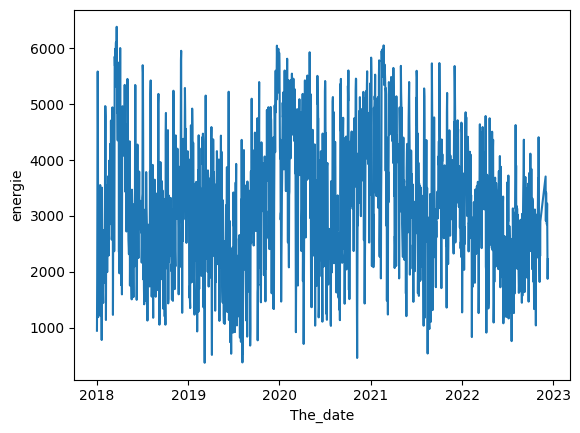

In [10]:
sns.lineplot(data=df, x='The_date',y='energie')

In [5]:
df_rain=df_rain.set_index('data')
df_rain


,Alqueva,Castelo de bode,Marateca,Caia,Maranhão,Douro- Cabreira,Douro- Vilar,Douro-Tua,Alto- Lindoso,Miranda-Douro,...,Valeira,Bemposta,Carrapatelo,Pocinho,Picote,Baixo Sabor,RÃ©gua,Crestuma - Lever,Varosa,TorrÃ£o
data,,,,,,,,,,,,,,,,,,,,,
01.01.2018,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.075,0.050,...,0.050,0.0,0.000,0.0,0.050,0.050,0.050,0.000,0.050,0.000
02.01.2018,0.000,0.000,0.000,0.000,0.000,0.0,0.100,0.0,0.500,0.275,...,0.275,0.0,0.000,0.0,0.275,0.275,0.275,0.000,0.275,0.000
03.01.2018,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.150,0.150,...,0.150,0.0,0.000,0.0,0.150,0.150,0.150,0.000,0.150,0.000
04.01.2018,0.000,0.000,0.000,0.000,0.000,0.0,0.025,0.0,0.125,0.075,...,0.075,0.0,0.000,0.0,0.075,0.075,0.075,0.000,0.075,0.000
05.01.2018,0.725,0.700,0.550,0.300,0.600,0.0,0.425,0.0,1.475,0.375,...,0.375,0.0,0.000,0.0,0.375,0.375,0.375,0.000,0.375,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05.11.2022,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,...,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
06.11.2022,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.075,0.050,...,0.050,0.0,0.125,0.0,0.050,0.050,0.050,0.100,0.050,0.125
07.11.2022,0.000,0.000,0.025,0.000,0.000,0.0,0.000,0.0,0.150,0.000,...,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.025,0.000,0.000


In [6]:
#df_temp=df_temp.set_index('data')
df_temp['data'] =  pd.to_datetime(df_temp['data'], format='%d.%m.%Y')
df_temp=df_temp.set_index('data')
df_temp

,Alqueva,Castelo de Bode,Marateca,Miranda Douro,Veleira,Bemposta,Pocinho,Régua,Picote,Baixo Sabor,Varosa,Foz Tua,Carrapatelo,Crestuma-Lever,Vilar
data,,,,,,,,,,,,,,,
2018-01-01,8.75,9.50,7.00,0.00,0.00,0.00,0.00,7.00,7.00,7.00,7.00,0.00,0.00,0.00,6.25
2018-01-02,9.75,11.00,8.50,0.00,0.00,0.00,0.00,9.75,9.75,9.75,9.75,0.00,0.00,0.00,8.75
2018-01-03,12.00,13.50,11.50,0.00,0.00,0.00,0.00,11.50,11.50,11.50,11.50,0.00,0.00,0.00,11.25
2018-01-04,12.00,12.50,10.75,0.00,0.00,0.00,0.00,11.00,11.00,11.00,11.00,0.00,0.00,0.00,10.50
2018-01-05,11.00,11.00,9.75,0.00,0.00,0.00,0.00,8.00,8.00,8.00,8.00,0.00,0.00,0.00,7.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-05,14.75,12.50,10.25,10.00,10.00,10.00,10.00,9.50,9.50,9.50,9.50,10.00,10.50,14.00,9.00
2022-11-06,15.00,12.25,10.25,11.25,11.25,11.25,11.25,10.75,10.75,10.75,10.75,11.50,11.50,15.25,10.00
2022-11-07,17.25,14.00,11.50,11.75,11.75,11.75,11.75,11.25,11.25,11.25,11.25,12.00,11.50,16.25,10.00


In [7]:
#Defining goals
target= 'energie'
n_targets=1
n_features=len(df_temp.columns)+len(df_rain.columns)  #add up rain and temperature dataframes columns ( the features we using)

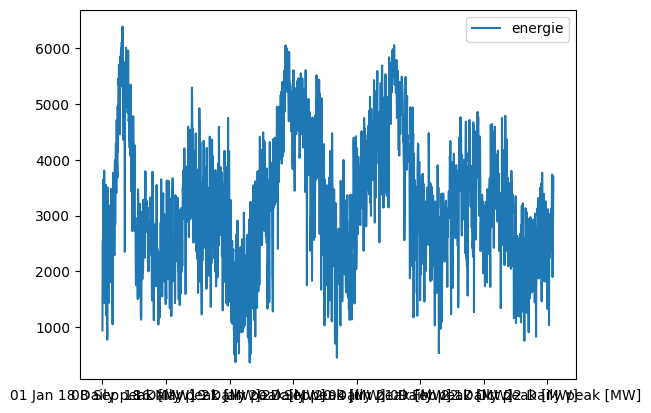

In [8]:
plot_cols = [target]
plot_features1 = df[plot_cols]
plot_features1.index = df.index
plot_features1.plot(subplots = True);

In [9]:
dataframe=

SyntaxError: invalid syntax (1001787884.py, line 1)